## Structuring Portfolio Data

In this notebook I want to define one function structuring portfolio data in one DataFrame. Then I put this function in a file called `Utils.py` from which I can call it directly and see the results.

The starting point is a set of assets - that I call `tickers` - to be included in a portfolio.
Then I want to collect the historical prices of these assets using the function `prices` defined in *Chap_1* and saved in the `Utils.py` file.

The last step is putting all ticker historical prices in one DataFrame.

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
plt.style.use('ggplot')

#### 1. Asset tickers and their historical prices

Say that I take 4 ETFs listed at Milano stock exchange. I create a list of their `tickers`.

In [3]:
tickers = ['CSSPX','PHAU','EM710','ITPS']

To collect these asset historical prices, I use the function `prices` defined in *Chap_1* and located in the `Utils.py` file. Then I create a list of all the ticker historical series.

In [4]:
from Utils import prices

In [5]:
data_yf = [] # empty list of the historical price series from 'yf'
for tick in tickers:
    data_yf.append(prices(ticker=tick)) # using 'yf' as data source

I want to check if the different tickers have a common starting date. In fact, different assets might have been launched at different dates.

In [6]:
for tick in data_yf:
    print(tick.index[0])

2010-05-19 00:00:00
2008-01-02 00:00:00
2008-01-02 00:00:00
2008-01-02 00:00:00


In [7]:
data_csv = [] # empty list of the historical price series from 'csv' files
for tick in tickers:
    data_csv.append(prices(ticker=tick, source='csv')) # using 'csv' files as data source

In [8]:
for tick in data_csv:
    print(tick.index[0])

2010-05-26 00:00:00
2007-06-20 00:00:00
2016-07-25 00:00:00
2007-03-20 00:00:00


Whatever the data source is, these assets have been launched at different dates. Therefore, I need to find a common starting date, that is the date of the most recently launched asset.

Using `join = 'inner'` when concatenating the historical series, will give a DataFrame with all series starting from a common date (the launch date of the most recently launched asset).

In [9]:
pd.concat(data_yf, axis=1, join='inner').head()

,CSSPX,PHAU,EM710,ITPS
Date,,,,
2010-05-19,72.849998,95.830002,122.160004,133.350006
2010-05-20,72.849998,95.070000,122.199997,132.089996
2010-05-21,72.849998,93.260002,122.349998,130.199997
2010-05-24,72.849998,95.139999,122.519997,132.380005
2010-05-25,72.849998,96.599998,122.690002,134.350006


In [10]:
pd.concat(data_yf, axis=1, join='inner').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3783 entries, 2010-05-19 to 2025-04-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CSSPX   3783 non-null   float64
 1   PHAU    3783 non-null   float64
 2   EM710   3783 non-null   float64
 3   ITPS    3783 non-null   float64
dtypes: float64(4)
memory usage: 147.8 KB


In [11]:
pd.concat(data_csv, axis=1, join='inner').head()

,CSSPX,PHAU,EM710,ITPS
Date,,,,
2016-07-25,185.15,115.90,174.42,184.59
2016-07-26,184.96,115.95,174.31,184.42
2016-07-27,185.05,116.47,174.80,184.57
2016-07-28,183.15,116.19,174.82,183.81
2016-07-29,182.86,116.36,175.36,183.10


In [12]:
pd.concat(data_csv, axis=1, join='inner').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2211 entries, 2016-07-25 to 2025-04-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CSSPX   2211 non-null   float64
 1   PHAU    2211 non-null   float64
 2   EM710   2211 non-null   float64
 3   ITPS    2211 non-null   float64
dtypes: float64(4)
memory usage: 86.4 KB


#### 2. Putting all together in one function

I want to create a function that takes all asset historical price series and arrange them into a DataFrame. Each column reports the asset's price. The index are the dates starting from a common starting date (determined by the 'inner' join).

In [13]:
def portfolio_prices(data):
    """Structures in a DataFrame daily price data of tickers in portfolio starting from a common date.
    
    Args:
        data (list): List of pd.Series per each ticker historical prices.

    Returns:
        pandas.DataFrame: daily price data of tickers in portfolio, indexed by date.
    
    """
    return pd.concat(data, axis=1, join='inner')

<Axes: xlabel='Date'>

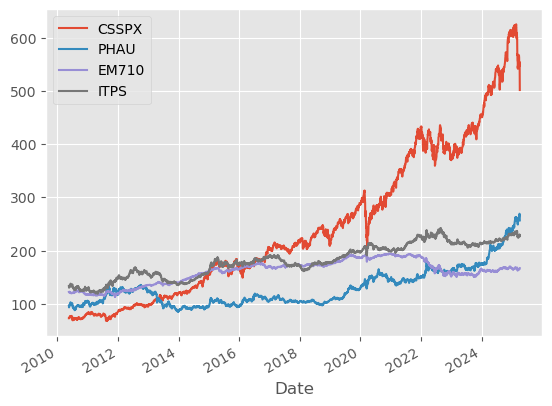

In [14]:
portfolio_prices(data_yf).plot()

### Summary

In this chapter we have addressed the problem of taking historical prices series of different tickers in a portfolio and arranged them in one DataFrame with a common starting date.

We used `join = 'inner'` in the function `portfolio_prices` to concatenate the historical price series in one DataFrame with all series starting from a common date (the launch date of the most recently launched asset). 


In [15]:
# create a list of portfolio tickers
tickers = ['CSSPX','PHAU','EM710','ITPS']

# create a list of pd.Series with each ticker's historical prices
data = [] # empty list of the historical price series
for tick in tickers:
    data.append(prices(ticker=tick, source='yf')) # using 'yf' as data source

# create the DataFrame with all historical prices of tickers in portfolio
portfolio_prices = portfolio_prices(data)

portfolio_prices.head()


,CSSPX,PHAU,EM710,ITPS
Date,,,,
2010-05-19,72.849998,95.830002,122.160004,133.350006
2010-05-20,72.849998,95.070000,122.199997,132.089996
2010-05-21,72.849998,93.260002,122.349998,130.199997
2010-05-24,72.849998,95.139999,122.519997,132.380005
2010-05-25,72.849998,96.599998,122.690002,134.350006
